In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
file_path = 'data_files/Video_Games_Sales_as_at_22_Dec_2016.csv'

# Load the dataset
df = pd.read_csv(file_path)

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  Us

In [19]:
# Check for missing values
print(df.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [21]:
# Drop rows with missing values in key columns
df.dropna(subset=['Year_of_Release', 'Publisher'], inplace=True)

In [23]:
# Convert Year_of_Release to integer
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

In [25]:
print(df.isnull().sum())

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8436
Critic_Count       8436
User_Score         6581
User_Count         8957
Developer          6514
Rating             6651
dtype: int64


In [29]:
# Set up the plot style
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

C:\Users\New\AppData\Local\Temp\ipykernel_7656\2369311464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')


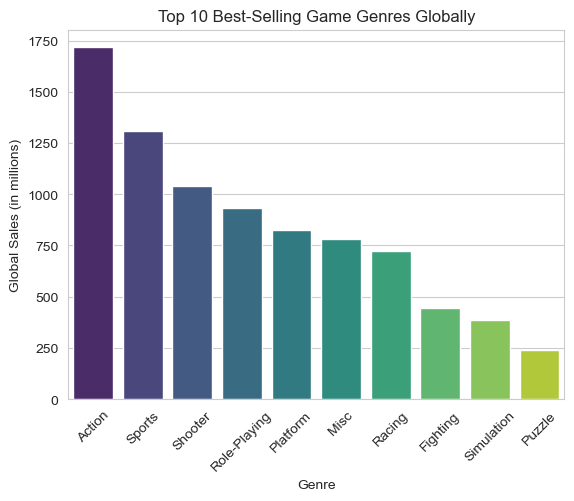

In [31]:
# What are the top 10 best-selling game genres?
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title('Top 10 Best-Selling Game Genres Globally')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
# plt.savefig('top_genres.png') # Use this to save the plot
plt.show()

C:\Users\New\AppData\Local\Temp\ipykernel_7656\3779312041.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='plasma')


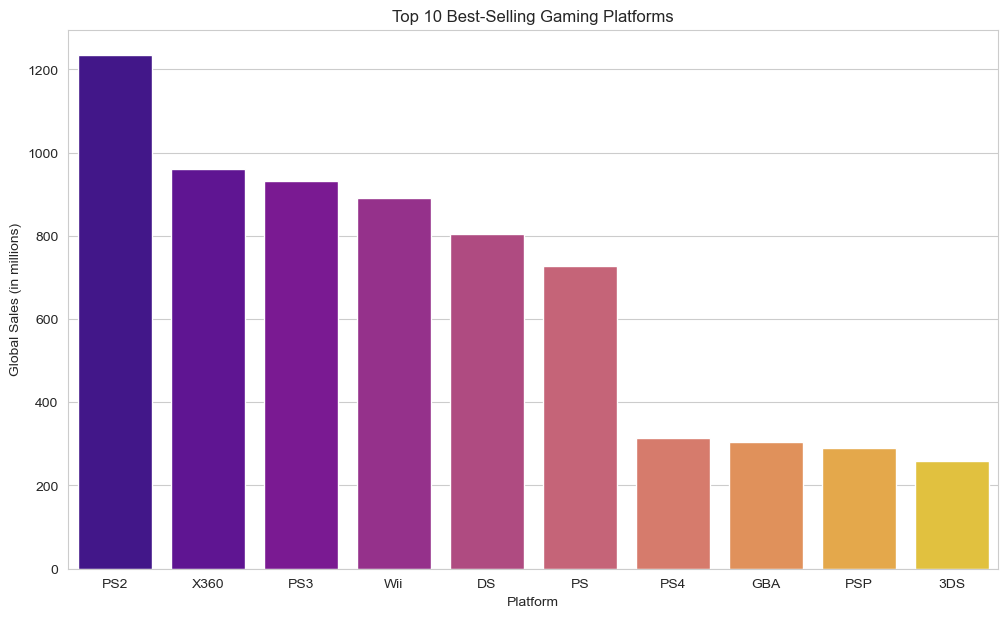

In [33]:
# What are the top 10 best-selling platforms?
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='plasma')
plt.title('Top 10 Best-Selling Gaming Platforms')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
# plt.savefig('top_platforms.png')
plt.show()

C:\Users\New\AppData\Local\Temp\ipykernel_7656\4212872799.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_sales.index, y=publisher_sales.values, palette='magma')


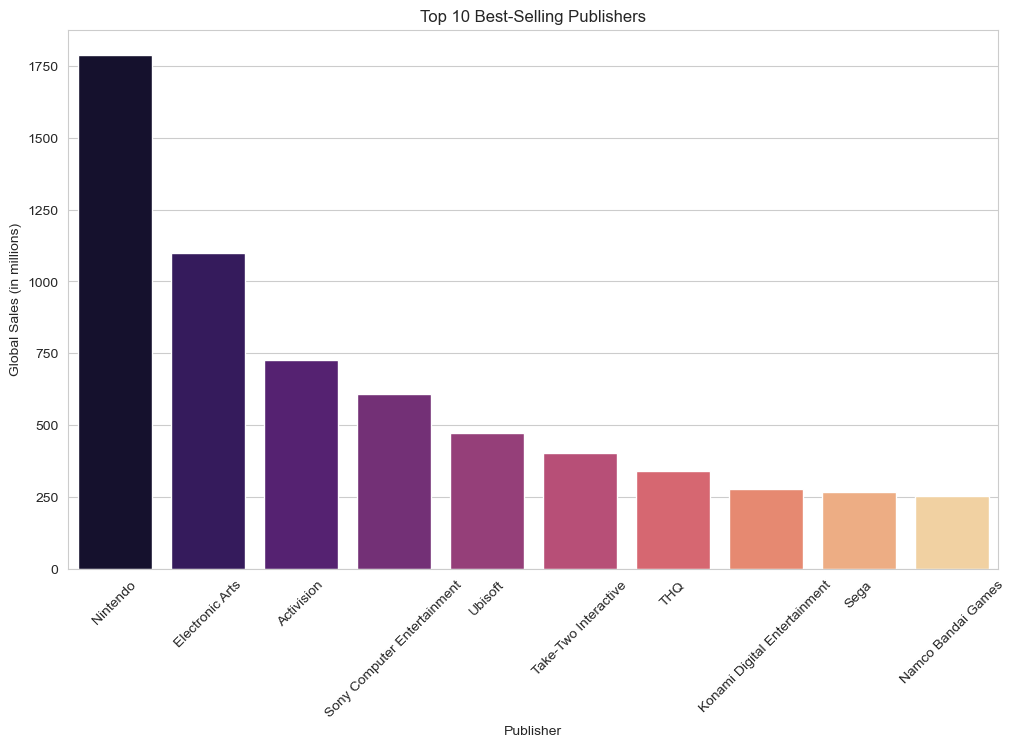

In [35]:
# Who are the top 10 best-selling publishers?
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=publisher_sales.index, y=publisher_sales.values, palette='magma')
plt.title('Top 10 Best-Selling Publishers')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
# plt.savefig('top_publishers.png')
plt.show()